In [2]:
!pip install facenet_pytorch
from facenet_pytorch import MTCNN
import cv2
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm

     |████████████████████████████████| 1.9 MB 4.0 MB/s 


In [5]:
from google.colab import drive

drive.mount("/content/")

Mounted at here


# Getting started with MTCNN

torch.Size([3, 160, 160])

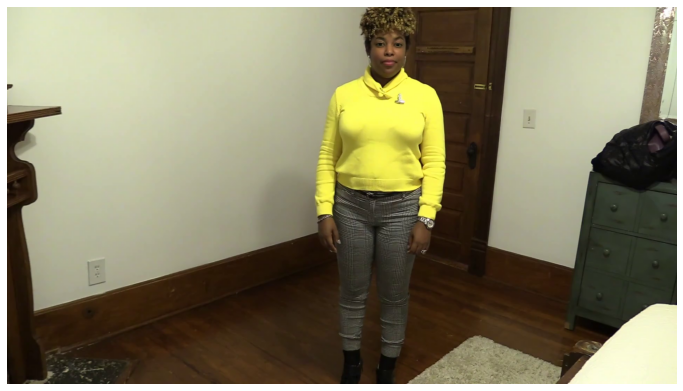

In [57]:
image_path = "/content/here/MyDrive/AI School/Project 02 Computer Vision /input_videos/agqphdxmwt.mp4"

mtcnn = MTCNN(select_largest=False, device='cuda')

# Load a single image and display
# "ret" obtains return value from the camera frames (true or false).
# frame will get the next frame in the camera (via "cap")
v_cap = cv2.VideoCapture(image_path)
success, frame = v_cap.read()
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
frame = Image.fromarray(frame)

plt.figure(figsize=(12, 8))
plt.imshow(frame)
plt.axis('off')

# Detect face
face = mtcnn(frame)
face.shape

# Preventing image normalisation

(-0.5, 159.5, 159.5, -0.5)

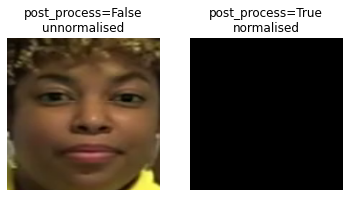

In [31]:
# Create face detector
## post_process=False   
##   prevents normalisation. If you are curious as what it really does,
##   try running the code without this parameter and see it for yourself!
mtcnn_unnormal = MTCNN(select_largest=False, post_process=False, device='cuda:0')
mtcnn_normal = MTCNN(select_largest=False, post_process=True, device='cuda:0') # In fact, no need to set it True cause it's the deafult value. 

# Detect face
face_unnormal = mtcnn_unnormal(frame)
face_normal = mtcnn_normal(frame)

# Visualize
fig, axes = plt.subplots(1, 2)

axes[0].imshow(face_unnormal.permute(1, 2, 0).int().numpy())
axes[0].set_title('post_process=False\nunnormalised')
axes[0].axis('off')
axes[1].set_title('post_process=True\nnormalised')
axes[1].imshow(face_normal.permute(1, 2, 0).int().numpy())
axes[1].axis('off')

# Margen Adjustment
_"Depending on your downstream processing and **how fakes can be identified**, you may want to add more (or less) of a margin around the detected faces. This is controlled using the margin argument."_

- so it means margin adjustment can help classify fake faces...?

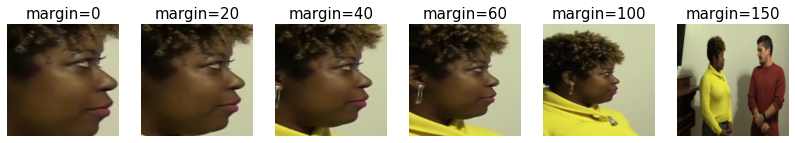

In [114]:
# Create face detector
## margin=n     this parameter sets the margin.

MODELS = []
FACES = []
MARGINS = [0, 20, 40, 60, 100, 150]

def set_margin(num):
    mtcnn = MTCNN(margin=num, select_largest=False, post_process=False, device='cuda:0')
    return mtcnn

for i in range(len(MARGINS)):
    MODELS.append(set_margin(MARGINS[i]))
    FACES.append(MODELS[i](frame))
    
# Visualize
figure, axes = plt.subplots(1, 6, figsize=(14,14))

PERMUTED_FACES  = []

for face in FACES:
    face = face.permute(1, 2, 0).int().numpy()
    PERMUTED_FACES.append(face)

for i in range(len(PERMUTED_FACES)):
    axes[i].imshow(PERMUTED_FACES[i])
    axes[i].set_title(f'margin={MARGINS[i]}', fontsize=15)
    axes[i].axis('off')

In [115]:
## Visually understanding the building blocks. 
print('FACES[0] dtype: ', type(FACES[0]))
print('FACES[0].shape: ', FACES[0].shape)
print('FACES[0][0].shape', FACES[0][0].shape)
print('FACES[0][0]', FACES[0][0])
print("")
print('PERMUTED_FACES[0] dtype: ', type(PERMUTED_FACES[0]))
print('PERMUTED_FACES[0].shape: ', PERMUTED_FACES[0].shape)
print('PERMUTED_FACES[0][0]: ', PERMUTED_FACES[0][0])

FACES[0] dtype:  <class 'torch.Tensor'>
FACES[0].shape:  torch.Size([3, 160, 160])
FACES[0][0].shape torch.Size([160, 160])
FACES[0][0] tensor([[ 38.,  34.,  30.,  ...,  73.,  76.,  79.],
        [ 28.,  27.,  24.,  ...,  77.,  81.,  84.],
        [ 24.,  23.,  21.,  ...,  81.,  85.,  88.],
        ...,
        [ 60.,  59.,  59.,  ..., 195., 195., 195.],
        [ 60.,  59.,  59.,  ..., 195., 195., 195.],
        [ 60.,  59.,  59.,  ..., 195., 195., 195.]])

PERMUTED_FACES[0] dtype:  <class 'numpy.ndarray'>
PERMUTED_FACES[0].shape:  (160, 160, 3)
PERMUTED_FACES[0][0]:  [[38 31 15]
 [34 27 11]
 [30 24  9]
 [24 19  5]
 [22 17  3]
 [19 13  4]
 [17 11  2]
 [16 10  2]
 [16 10  3]
 [16 10  3]
 [15 11  3]
 [15 11  3]
 [17 13  5]
 [18 14  6]
 [19 15  7]
 [19 15  7]
 [18 14  6]
 [18 14  6]
 [15 11  3]
 [14 10  2]
 [14 10  2]
 [13  9  1]
 [13  9  1]
 [13  9  1]
 [13  9  1]
 [12  8  0]
 [12  8  0]
 [12  8  0]
 [11  7  0]
 [11  7  0]
 [13  7  0]
 [13  7  0]
 [15  9  2]
 [17 11  4]
 [19 13  6]
 [22

# Multiple faces in a single image
- ```keep_all=True``` does the magic. It keeps all detected faces.
- When this parameter is True, it is important that your for loop has multiple faces, otherwise it may produce error in the for loop **due to the iterability** issue.


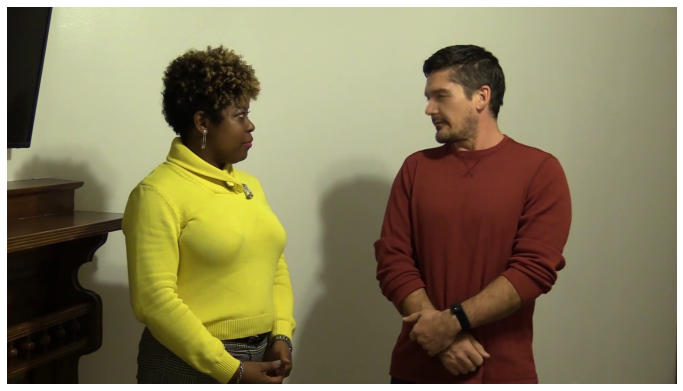

faces shape:  torch.Size([2, 3, 160, 160])


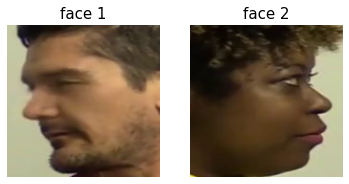

In [85]:
# Create face detector
mtcnn = MTCNN(margin=20, keep_all=True, post_process=False, device='cuda:0')

image_dir = '/content/here/MyDrive/AI School/Project 02 Computer Vision /input_videos/'

multiple_faces_video = image_dir + "aapnvogymq.mp4"

# Load a single image and display
v_cap = cv2.VideoCapture(multiple_faces_video)
success, frame = v_cap.read()
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
frame = Image.fromarray(frame)

plt.figure(figsize=(12, 8))
plt.imshow(frame)
plt.axis('off')
plt.show()

# Detect face
faces = mtcnn(frame)

# Visualize
print('faces shape: ', faces.shape)
fig, axes = plt.subplots(1, len(faces))
i = 0
for face, ax in zip(faces, axes):
    ax.imshow(face.permute(1, 2, 0).int().numpy())
    ax.set_title(f'face {i + 1}', fontsize=15)
    ax.axis('off')
    i += 1
fig.show()

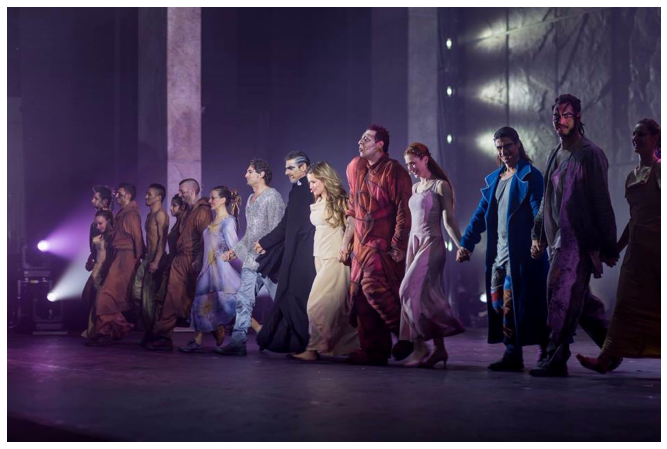

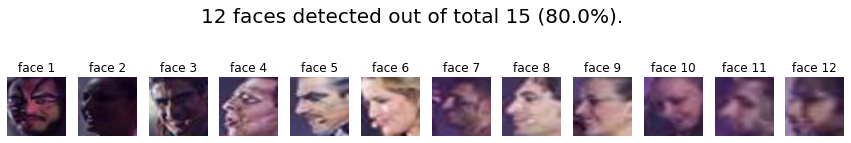

In [150]:
# Testing this cool code with multiple faces from my fav artworks
notre_dame = '/content/here/MyDrive/AI School/Project 02 Computer Vision /MTCNN_multiple_faces/notre_dame_de_paris.jpg'

mtcnn = MTCNN(margin=20, keep_all=True, post_process=False, device='cuda:0')

# Load image and display
i_cap = cv2.VideoCapture(notre_dame)
success, frame = i_cap.read()
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
frame = Image.fromarray(frame)

plt.figure(figsize=(12, 8))
plt.imshow(frame)
plt.axis('off')
plt.show()

# Detect face
faces = mtcnn(frame)

# Visaulise
i = 0
fig, axes = plt.subplots(1, len(faces), figsize=(15,15))
for face, ax in zip(faces, axes):
    ax.imshow(face.permute(1, 2, 0).int().numpy())
    ax.set_title(f'face {i + 1}')
    ax.axis('off')
    i += 1
plt.subplots_adjust(top=1.65)
fig.suptitle(f'{len(faces)} faces detected out of total 15 ({len(faces)/15*100}%).', fontsize=20)
fig.show()

# Batched Detection

  0%|          | 0/300 [00:00<?, ?it/s]

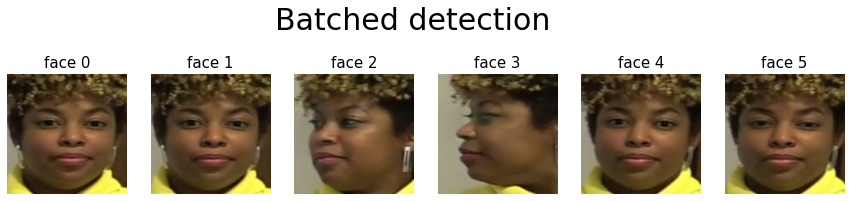

In [166]:
# Create face detector
mtcnn = MTCNN(margin=30, keep_all=True, post_process=False, device='cuda:0')

# Load a video
v_cap = cv2.VideoCapture(image_path)
v_len = int(v_cap.get(cv2.CAP_PROP_FRAME_COUNT))  # frame count = 300

# Loop through video, taking a handful of frames to form a batch
frames = []     # total 6 PIL.Image.Image elements

for i in tqdm(range(v_len)):
    
    # Load frame
    success = v_cap.grab()
    if i % 50 == 0:
        success, frame = v_cap.retrieve()
    else:
        continue
    if not success:
        continue
        
    # Add to batch
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    frames.append(Image.fromarray(frame))

# Detect faces in batch
faces = mtcnn(frames)

fig, axes = plt.subplots(1, len(faces), figsize=(15, 15))
for i, frame_faces in enumerate(faces):
    for j, face in enumerate(frame_faces):
        axes[i].imshow(face.permute(1, 2, 0).int().numpy())
        axes[i].set_title(f'face {i}', fontsize=15)
        axes[i].axis('off')
plt.subplots_adjust(top=1.6)
fig.suptitle('Batched detection', fontsize=30)
fig.show()

In [165]:
# overview
print('video frame count: ', v_len)
print('frames length: ', len(frames))
print('frames type: ', type(frames[0]))
print('frames[0] ', frames[0])
print(frames[0])

video frame count:  300
frames length:  6
frames type:  <class 'PIL.Image.Image'>
frames[0]  <PIL.Image.Image image mode=RGB size=1920x1080 at 0x7F261E9E7610>
<PIL.Image.Image image mode=RGB size=1920x1080 at 0x7F261E9E7610>


  0%|          | 0/300 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/facenet_pytorch/models/utils/detect_face.py:183: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  batch_boxes, batch_points = np.array(batch_boxes), np.array(batch_points)
/usr/local/lib/python3.7/dist-packages/facenet_pytorch/models/mtcnn.py:339: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  boxes = np.array(boxes)
/usr/local/lib/python3.7/dist-packages/facenet_pytorch/models/mtcnn.py:340: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndar

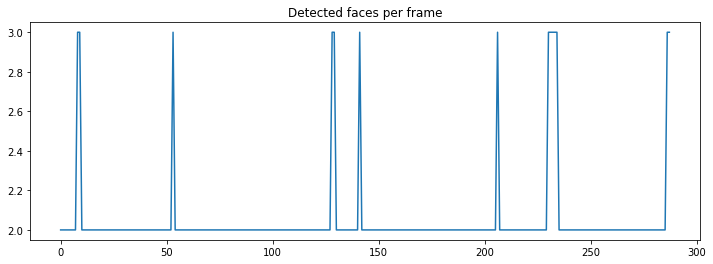

In [171]:
# Load a video
v_cap = cv2.VideoCapture(multiple_faces_video)
v_len = int(v_cap.get(cv2.CAP_PROP_FRAME_COUNT))

# Loop through video
batch_size = 16
frames = []
faces = []

for _ in tqdm(range(v_len)):
    
    # Load frame
    success, frame = v_cap.read()
    if not success:
        continue
        
    # Add to batch
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    frames.append(Image.fromarray(frame))
    
    # When batch is full, detect faces and reset batch list
    if len(frames) >= batch_size:
        faces.extend(mtcnn(frames))
        frames = []

plt.figure(figsize=(12, 4))
plt.plot([len(f) for f in faces])
plt.title('Detected faces per frame');

# Bounding Boxes and Facial Landmarks

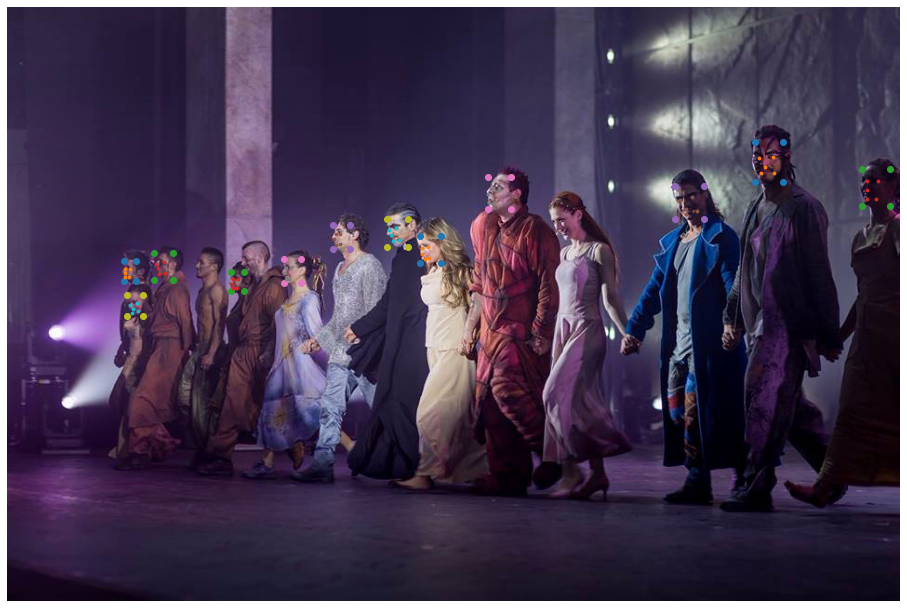

In [174]:
# Create face detector
mtcnn = MTCNN(keep_all=True, device='cuda:0')

# Load a single image and display
v_cap = cv2.VideoCapture(notre_dame)
success, frame = v_cap.read()
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
frame = Image.fromarray(frame)

# Detect face
boxes, probs, landmarks = mtcnn.detect(frame, landmarks=True)

# Visualize
fig, ax = plt.subplots(figsize=(16, 12))
ax.imshow(frame)
ax.axis('off')

for box, landmark in zip(boxes, landmarks):
    ax.scatter(*np.meshgrid(box[[0, 2]], box[[1, 3]]))
    ax.scatter(landmark[:, 0], landmark[:, 1], s=8)
fig.show()

# List of snippets and functions for further practice
- fig, axes = plt.subplots(1, 2)
- fig.suptitle('Set a single main title for subplots') 

# References
- https://stackoverflow.com/questions/41793931/plotting-images-side-by-side-using-matplotlib
- https://www.geeksforgeeks.org/how-to-set-a-single-main-title-for-all-the-subplots-in-matplotlib/

In [ ]:
fig.suptitle('Set a single main title for subplots', fontsize=30)

# Error Notes


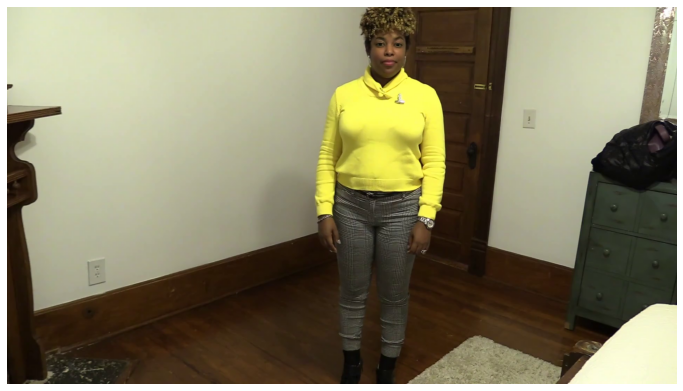

TypeError: ignored

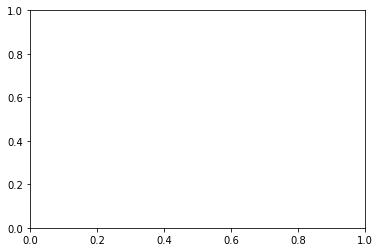

In [63]:
# Create face detector
mtcnn = MTCNN(margin=20, keep_all=True, post_process=False, device='cuda:0')

multiple_faces = "/content/here/MyDrive/AI School/Project 02 Computer Vision /ASIAN Face recognition test/UNKNOWN/IU6 super tricky.jpg"

# Load a single image and display
v_cap = cv2.VideoCapture(image_path)
success, frame = v_cap.read()
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
frame = Image.fromarray(frame)

plt.figure(figsize=(12, 8))
plt.imshow(frame)
plt.axis('off')
plt.show()

# Detect face
faces = mtcnn(frame)

# Visualize
fig, axes = plt.subplots(1, len(faces))
for face, ax in zip(faces, axes):
    ax.imshow(face.permute(1, 2, 0).int().numpy())
    ax.axis('off')
fig.show()

## print('dtype: ', type(faces))
print('shape: ', faces.shape)
print(faces)